<a href="https://colab.research.google.com/github/khalid-shohag/AI_LAB/blob/master/lab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages

In [ ]:
!pip install torchinfo

# Neccessary Packages

In [ ]:
importimport torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torchinfo

# Device CUDA

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Generation of CNN model

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=1)
        self.linear1 = nn.Linear(in_features= 64 * 22 * 22, out_features=10)
        # self.linear2 = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = torch.flatten(x, 1)

        x = self.linear1(x)
        # x = self.linear2(x)

        return x


# Model Summary

In [ ]:
model = CNN()
torchinfo.summary(model, input_size=(1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [1, 10]                   --
├─Conv2d: 1-1                            [1, 32, 26, 26]           320
├─Conv2d: 1-2                            [1, 64, 24, 24]           18,496
├─ReLU: 1-3                              [1, 64, 24, 24]           --
├─MaxPool2d: 1-4                         [1, 64, 22, 22]           --
├─Linear: 1-5                            [1, 10]                   309,770
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
Total mult-adds (M): 11.18
Input size (MB): 0.00
Forward/backward pass size (MB): 0.47
Params size (MB): 1.31
Estimated Total Size (MB): 1.79

# MNIST DATASET

In [ ]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16039170.49it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 482183.93it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4406061.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4646470.43it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# MNIST Dataset Augmentation. Zoom, Shift, Rotation, Shear

In [ ]:

# Original
dataset_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

mnist_train.transform = dataset_transform
mnist_test.transform = dataset_transform

# Rotation
dataset_transform_rotation = transforms.Compose([
    transforms.RandomAffine(degrees=7),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

mnist_train_rotation = mnist_train
mnist_test_rotation = mnist_test
mnist_train_rotation.transform = dataset_transform_rotation
mnist_test_rotation.transform = dataset_transform_rotation

#combine
combine_train = torch.utils.data.ConcatDataset([mnist_train, mnist_train_rotation])
combine_test = torch.utils.data.ConcatDataset([mnist_test, mnist_test_rotation])

mnist_train_rotation = torch.utils.data.DataLoader(mnist_train_rotation, shuffle=True, batch_size=32)
mnist_test_rotation = torch.utils.data.DataLoader(mnist_test_rotation, shuffle=True, batch_size=32)

# Shift
dataset_transform_translate = transforms.Compose([
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

mnist_train_translate = mnist_train
mnist_test_translate = mnist_test
mnist_train_translate.transform = dataset_transform_translate
mnist_test_translate.transform = dataset_transform_translate

#combine
combine_train = torch.utils.data.ConcatDataset([combine_train, mnist_train_translate])
combine_test = torch.utils.data.ConcatDataset([combine_test, mnist_test_translate])

mnist_train_translate = torch.utils.data.DataLoader(mnist_train_translate, shuffle=True, batch_size=32)
mnist_test_translate = torch.utils.data.DataLoader(mnist_test_translate, shuffle=True, batch_size=32)


# Shear
dataset_transform_shear = transforms.Compose([
    transforms.RandomAffine(degrees=0, shear=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

mnist_train_shear = mnist_train
mnist_test_shear = mnist_test
mnist_train_shear.transform = dataset_transform_shear
mnist_test_shear.transform = dataset_transform_shear

#combine
combine_train = torch.utils.data.ConcatDataset([combine_train, mnist_train_shear])
combine_test = torch.utils.data.ConcatDataset([combine_test, mnist_test_shear])


mnist_train_shear = torch.utils.data.DataLoader(mnist_train_shear, shuffle=True, batch_size=32)
mnist_test_shear = torch.utils.data.DataLoader(mnist_test_shear, shuffle=True, batch_size=32)

#scale
dataset_transform_scale = transforms.Compose([
    transforms.RandomAffine(degrees=0, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

mnist_train_scale = mnist_train
mnist_test_scale = mnist_test
mnist_train_scale.transform = dataset_transform_scale
mnist_test_scale.transform = dataset_transform_scale

#combine
combine_train = torch.utils.data.ConcatDataset([combine_train, mnist_train_scale])
combine_test = torch.utils.data.ConcatDataset([combine_test, mnist_test_scale])


mnist_train_scale = torch.utils.data.DataLoader(mnist_train_scale, shuffle=True, batch_size=32)
mnist_test_scale = torch.utils.data.DataLoader(mnist_test_scale, shuffle=True, batch_size=32)



train = torch.utils.data.DataLoader(mnist_train, shuffle=True, batch_size=32)
test = torch.utils.data.DataLoader(mnist_test, shuffle=True, batch_size=32)

combine_train = torch.utils.data.DataLoader(combine_train, shuffle=True, batch_size=32)
combine_test = torch.utils.data.DataLoader(combine_test, shuffle=True, batch_size=32)


In [ ]:
for index,  (images, labels) in enumerate (combine_test):
  print(index)
  break


0


# Print images

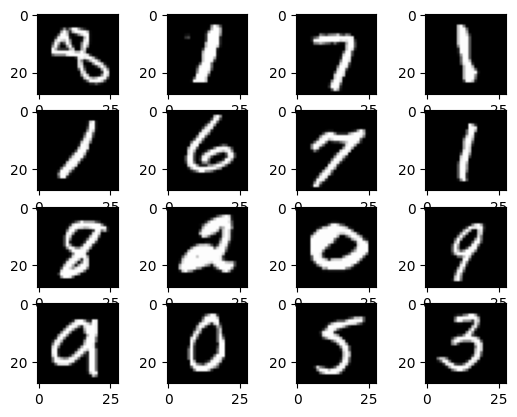

In [ ]:
for images, classes in mnist_train_scale:
  print_image = images
  break
v = 1
for i in range(16):
  plt.subplot(4, 4, v)
  v = v+1
  plt.imshow(print_image[i].reshape(28, 28), cmap='gray')

# Training Phase

In [ ]:
def train_model(model, criterion, optimizer, epochs, train):

  model.train()
  for epoch in range(epochs):

    losses = []
    acc = []

    running_loss = 0.0
    running_correct = 0.0
    total_samples = 0.0


    print(f'{epoch} ------- ')

    for index, (images, classes) in enumerate(train):

      images = images.to(device)
      classes = classes.to(device)

      optimizer.zero_grad()
      outputs = model(images)
      _, preds = torch.max(outputs, 1)
      loss = criterion(outputs, classes)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      running_correct += torch.sum(preds==classes.data)
      total_samples += images.size(0)

    epoch_loss = running_loss / len(train)
    epoch_acc = running_correct / total_samples

    print(f'{epoch}/{epochs} -------> Train Loss: {epoch_loss} Train Acc: {epoch_acc}')

    losses.append(epoch_loss)
    acc.append(epoch_acc)

  return model, losses, acc

# Testing Phase

In [ ]:
def test_model(model, test_data, criterion):
  model.eval()
  running_loss = 0.0
  running_correct = 0.0
  total_sample = 0.0
  with torch.no_grad():
    for index, (images, classes) in enumerate(test_data):

      images = images.to(device)
      classes = classes.to(device)

      outputs = model(images)
      _, preds = torch.max(outputs, 1)
      loss = criterion(outputs, classes)

      running_loss += loss.item()
      running_correct += torch.sum(preds==classes.data)
      total_sample += images.size(0)

  test_loss = running_loss/len(test)
  test_acc = running_correct / total_sample

  print(f'Test Loss: {test_loss} Test Acc: {test_acc}')

# Concatenate All the augmented Dataset to the original Dataset.

In [ ]:
# combine_train = torch.utils.data.ConcatDataset([train, mnist_train_rotation, mnist_train_scale, mnist_train_shear, mnist_train_translate])
# combine_test = torch.utils.data.ConcatDataset([test, mnist_test_rotation, mnist_test_scale, mnist_test_shear, mnist_test_translate])

# Train with original One and Test the model with each of the augmented test set

In [ ]:
torch.manual_seed(42)
model = CNN()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001325)
epochs = 5
trained_model, loss_list, acc_list = train_model(model, criterion, optimizer, epochs, train)

0 ------- 
0/5 -------> Train Loss: 0.12120879747839644 Train Acc: 0.9660166501998901
1 ------- 
1/5 -------> Train Loss: 0.057582666811393575 Train Acc: 0.982450008392334
2 ------- 
2/5 -------> Train Loss: 0.04271921468535729 Train Acc: 0.9869500398635864
3 ------- 
3/5 -------> Train Loss: 0.0338860410136797 Train Acc: 0.9900000095367432
4 ------- 
4/5 -------> Train Loss: 0.03206724597838135 Train Acc: 0.9908166527748108


In [ ]:
print('Test with Original Test')
test_model(trained_model, test, criterion)
print('Test with Translate Test')
test_model(trained_model, mnist_test_translate, criterion)
print('Test with Rotation Test')
test_model(trained_model, mnist_test_rotation, criterion)
print('Test with Scale Test')
test_model(trained_model, mnist_test_scale, criterion)
print('Test with Shear Test')
test_model(trained_model, mnist_test_shear, criterion)

Test with Original Test
Test Loss: 0.07254137063019635 Test Acc: 0.9848999977111816
Test with Translate Test
Test Loss: 0.07255987105985638 Test Acc: 0.9848999977111816
Test with Rotation Test
Test Loss: 0.07223530006447404 Test Acc: 0.9848999977111816
Test with Scale Test
Test Loss: 0.07295621269867515 Test Acc: 0.9848999977111816
Test with Shear Test
Test Loss: 0.07223623942207621 Test Acc: 0.9848999977111816


In [ ]:
print('Test with Combine Test')
print(len(combine_test))
test_model(trained_model, combine_test, criterion)


Test with Combine Test
1563
Test Loss: 0.5605252146033846 Test Acc: 0.9767599701881409


# Train with Augmented One and Test the model with the original test set

In [ ]:
torch.manual_seed(42)
model = CNN()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001325)
epochs = 5
trained_model, loss_list, acc_list = train_model(model, criterion, optimizer, epochs, combine_train)

0 ------- 
0/5 -------> Train Loss: 0.07837508113120363 Train Acc: 0.9770033359527588
1 ------- 
1/5 -------> Train Loss: 0.04561165271217406 Train Acc: 0.9868666529655457
2 ------- 
2/5 -------> Train Loss: 0.03749267754850037 Train Acc: 0.9890833497047424
3 ------- 
3/5 -------> Train Loss: 0.03327783053897901 Train Acc: 0.9908833503723145
4 ------- 
4/5 -------> Train Loss: 0.03149964100773008 Train Acc: 0.9915866851806641


In [ ]:
print('Test with Combine Test')
test_model(trained_model, combine_test, criterion)
print('Test with original test')
test_model(trained_model, test, criterion)

Test with Combine Test
Test Loss: 0.38627382374118513 Test Acc: 0.9857999682426453
Test with original test
Test Loss: 0.07619220202524045 Test Acc: 0.9864999651908875


In [ ]:
print('Test with Translate test')
test_model(trained_model, mnist_test_translate, criterion)

Test with Translate test
Test Loss: 0.07563020880795066 Test Acc: 0.9853999614715576
